<a href="https://colab.research.google.com/github/z-tufekci/DeepLearning/blob/main/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ⚓  Import required libraries like keras, tensorflow, sklearn ⚓

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

❤ Read Dataset from Colab. If you read from your current path you can you direct path.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('gdrive/My Drive/DeepLearning/94_character_TMNIST.csv')
#df = pd.read_csv('94_character_TMNIST.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
X = df.drop(columns={'names','labels'})
y = df[['labels']]
X.shape

(274093, 784)

In [ ]:
X_images = X.values.reshape(-1,28,28)
X_images.shape

(274093, 28, 28)

In [ ]:
X_train, X_test, _ , _ = train_test_split(X_images, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
X_train, X_test = X_train/255, X_test/255

(219274, 28, 28)
(54819, 28, 28)


Basic Autoencoder with ⛳ Encoder (1 Dense layer with Latent dimension) and  ⛳ Decoder(Sigmoid function as activation)


In [ ]:
class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

I experience with different range of latent dimensions, if it is less than 16 it turns out meaningless images, while the value is more than 64, it is very close to original image. This code we experience 16,32 and 64.

In [ ]:
latent_dim = [64,32,16]
ran = len(latent_dim)
images=[]
images.append(X_test[0:40,:,:]) # append original images
for i in range(ran):
    autoencoder = Autoencoder(latent_dim[i]) 
    autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
    autoencoder.fit(X_train, X_train,
                    epochs=10,
                    shuffle=True,
                    validation_data=(X_test, X_test))
    encoded_imgs = autoencoder.encoder(X_test).numpy()
    decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
    images.append(decoded_imgs[0:40,:,:]) # Append first 40 images

 ✅ This plot function shows all latent dimension in the same row. We can compare the quaity of images for each image. 

In [ ]:
def plot_result(decoded_imgs):
    n = 40
    fig = plt.figure(figsize=(5, 60))
    columns = ran+1
    rows = 40
    index = 0
    for i in range(1, columns*rows +1, ran+1):
        
        ax = fig.add_subplot(rows, columns, i)
        plt.imshow(decoded_imgs[0][index])
        plt.title("orginal")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        for j in range(1, ran+1): 
            ax = fig.add_subplot(rows, columns, i+j)
            plt.imshow(decoded_imgs[j][index])
            plt.title("latent "+ str(latent_dim[j-1]))
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        index += 1
    plt.show()

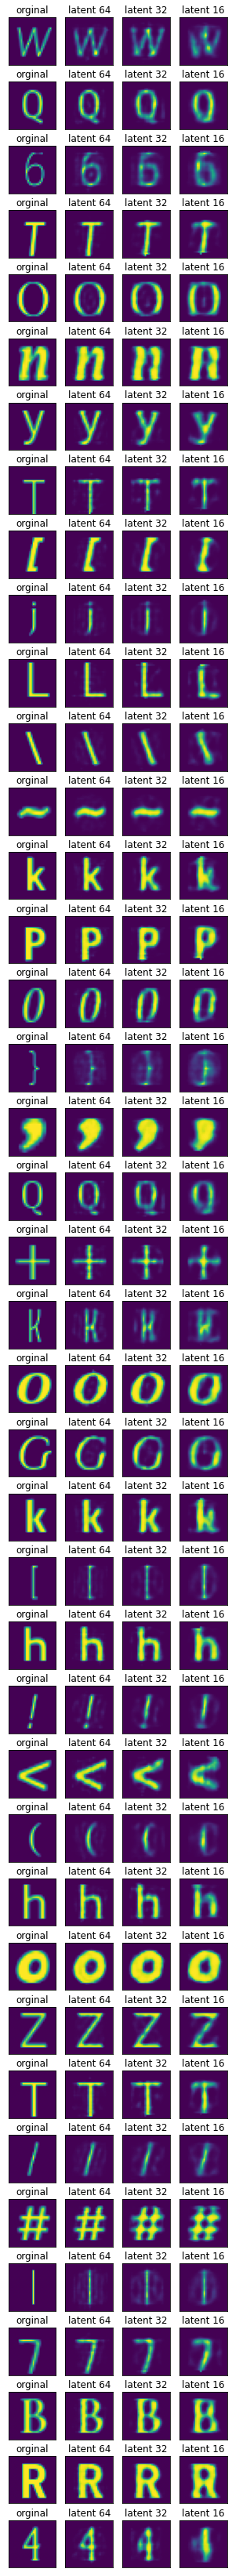

In [ ]:
plot_result(images)